<a href="https://www.kaggle.com/code/mampihemram/carprice?scriptVersionId=165503380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price/carprices.csv


Problem Statement: Create a model that will help me predict selling price

In [2]:
from sklearn.preprocessing import StandardScaler               #to scale data within 0 and 1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("/kaggle/input/car-price/carprices.csv")
data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [4]:
data.tail()

,Car Model,Mileage,Sell Price($),Age(yrs)
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6
10,Mercedez Benz C class,83000,20000,7
11,Mercedez Benz C class,79000,21000,7
12,Mercedez Benz C class,59000,33000,5


Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [6]:
data.shape

(13, 4)

In [7]:
data.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [8]:
data.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

Create Dummy values

In [9]:
encoded_data = pd.get_dummies(data, drop_first =True)
encoded_data.head()

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False


In [10]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Mileage                          13 non-null     int64
 1   Sell Price($)                    13 non-null     int64
 2   Age(yrs)                         13 non-null     int64
 3   Car Model_BMW X5                 13 non-null     bool 
 4   Car Model_Mercedez Benz C class  13 non-null     bool 
dtypes: bool(2), int64(3)
memory usage: 466.0 bytes


Change the data types of the columns

In [11]:
encoded_data = encoded_data.astype({"Car Model_BMW X5" : "int64","Car Model_Mercedez Benz C class" : "int64"})
encoded_data.dtypes

Mileage                            int64
Sell Price($)                      int64
Age(yrs)                           int64
Car Model_BMW X5                   int64
Car Model_Mercedez Benz C class    int64
dtype: object

In [12]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Mileage                          13 non-null     int64
 1   Sell Price($)                    13 non-null     int64
 2   Age(yrs)                         13 non-null     int64
 3   Car Model_BMW X5                 13 non-null     int64
 4   Car Model_Mercedez Benz C class  13 non-null     int64
dtypes: int64(5)
memory usage: 648.0 bytes


Feature Variables

In [13]:
X = encoded_data.drop(labels = 'Sell Price($)', axis = 1)

Target Variables

In [14]:
y = encoded_data['Sell Price($)']

Splitting the Dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")


X_train:(10, 4)
X_test:(3, 4)
y_train:(10,)
y_test:(3,)


Model fitting

In [16]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Mileage                          13 non-null     int64
 1   Sell Price($)                    13 non-null     int64
 2   Age(yrs)                         13 non-null     int64
 3   Car Model_BMW X5                 13 non-null     int64
 4   Car Model_Mercedez Benz C class  13 non-null     int64
dtypes: int64(5)
memory usage: 648.0 bytes


Setting the maximum depth of the tree

In [18]:
dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train,y_train)
print(f"Train Accuracy",dtr.score(X_train,y_train))
print(f"Testing Accuracy",dtr.score(X_test,y_test))

Train Accuracy 0.9298469252933703
Testing Accuracy 0.9189743589743589


Setting the minimum sample splitting

In [19]:
dtr = DecisionTreeRegressor(min_samples_split=3)
dtr.fit(X_train,y_train)
print(f"Train Accuracy",dtr.score(X_train,y_train))
print(f"Testing Accuracy",dtr.score(X_test,y_test))

Train Accuracy 0.9874032052461013
Testing Accuracy 0.9416954474097331


For visualization install pydotplus

In [20]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=9ec549029ae37c4aa19aa1cf43179efb92e719aec9975c57ae39dc2a81d607d6
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


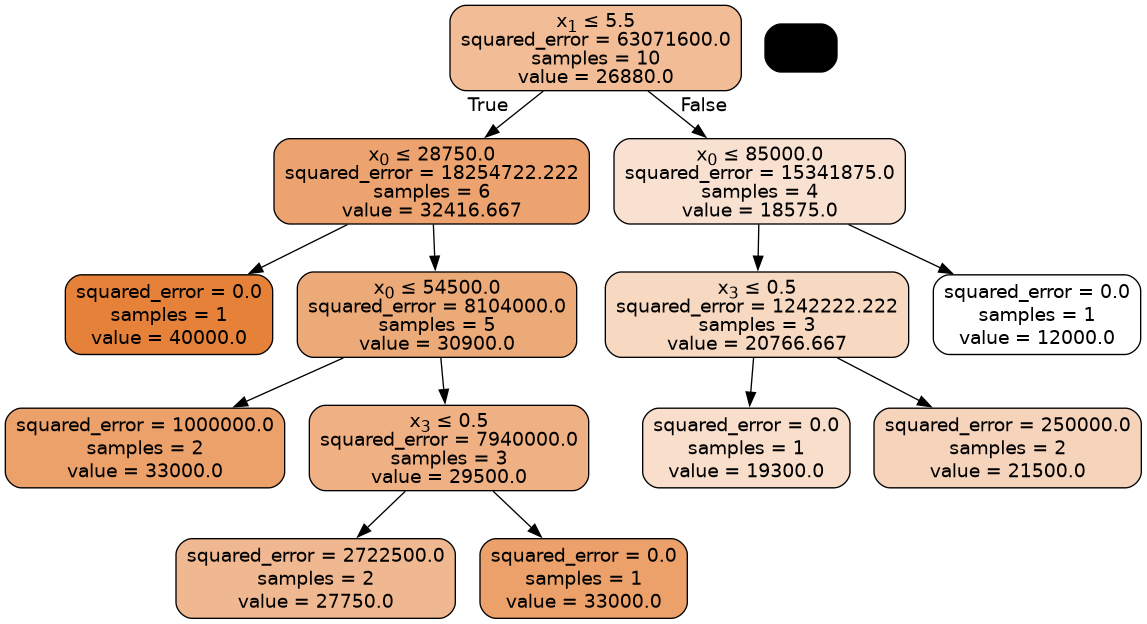

In [21]:
from sklearn.tree import export_graphviz  #create tree,visualize
import pydotplus
from IPython.display import Image #display tree
#Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtr,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )
#generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)
#display the graph
Image(graph.create_png())